In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [140]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('train shape', train.shape)
print('test shape', test.shape)


train shape (7352, 563)
test shape (2947, 563)


## ```Data is already normalized and standardized ```

In [16]:
print('Null Values In train: {}\n'.format(train.isna().sum().sum()))
print('Null Values In test: {}\n'.format(test.isna().sum().sum()))


Null Values In train: 0

Null Values In test: 0



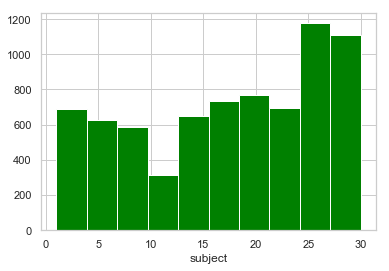

In [141]:
#x = pd.crosstab(train['subject'],train['Activity']).sum()
plt.hist(train['subject'],facecolor='green')
plt.xlabel('subject')
plt.show()



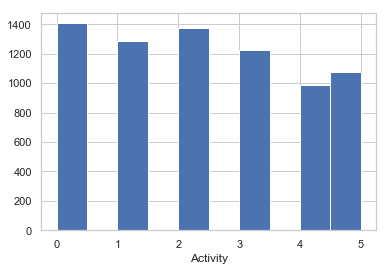

In [138]:
num_labels = 6
train_y = np.asarray(train.iloc[:,562])
act = np.unique(train_y)
for i in np.arange(num_labels):
    np.put(train_y, np.where(train_y==act[i]), i)

train_y = train_y.astype('int64')
plt.hist(train_y)
plt.xlabel('Activity')
plt.show()

```The data has 7352 observations with 563 variables with the first few columns representing the mean and standard deviations of body accelerations in 3 spatial dimensions (X, Y, Z). The last two columns are "subject" and "Acitivity" which represent the subject that the observation is taken from and the corresponding activity respectively. Let's see what activities have been recorded in this data.```

In [5]:
print('Train labels', train['Activity'].unique(), '\nTest Labels', test['Activity'].unique())

Train labels ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS'] 
Test Labels ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


```We have 6 activities, 3 passive (laying, standing and sitting) and 3 active (walking, walking_downstairs, walking_upstairs) which involve walking. So, each observation in the dataset represent one of the six activities whose features are recorded in the 561 variables. Our goal would be trian a machine to predict one of the six activities given a feature set of these 561 variables.```

In [31]:
pd.crosstab(train.subject, train.Activity)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
1,50,47,53,95,49,53
3,62,52,61,58,49,59
5,52,44,56,56,47,47
6,57,55,57,57,48,51
7,52,48,53,57,47,51
8,54,46,54,48,38,41
11,57,53,47,59,46,54
14,51,54,60,59,45,54
15,72,59,53,54,42,48


```Data is almost evenly distributed for all the activities among all the subjects. Let's pick all the subjects and compare the activities with the first three variables - mean body acceleration in 3 spatial dimensions.```

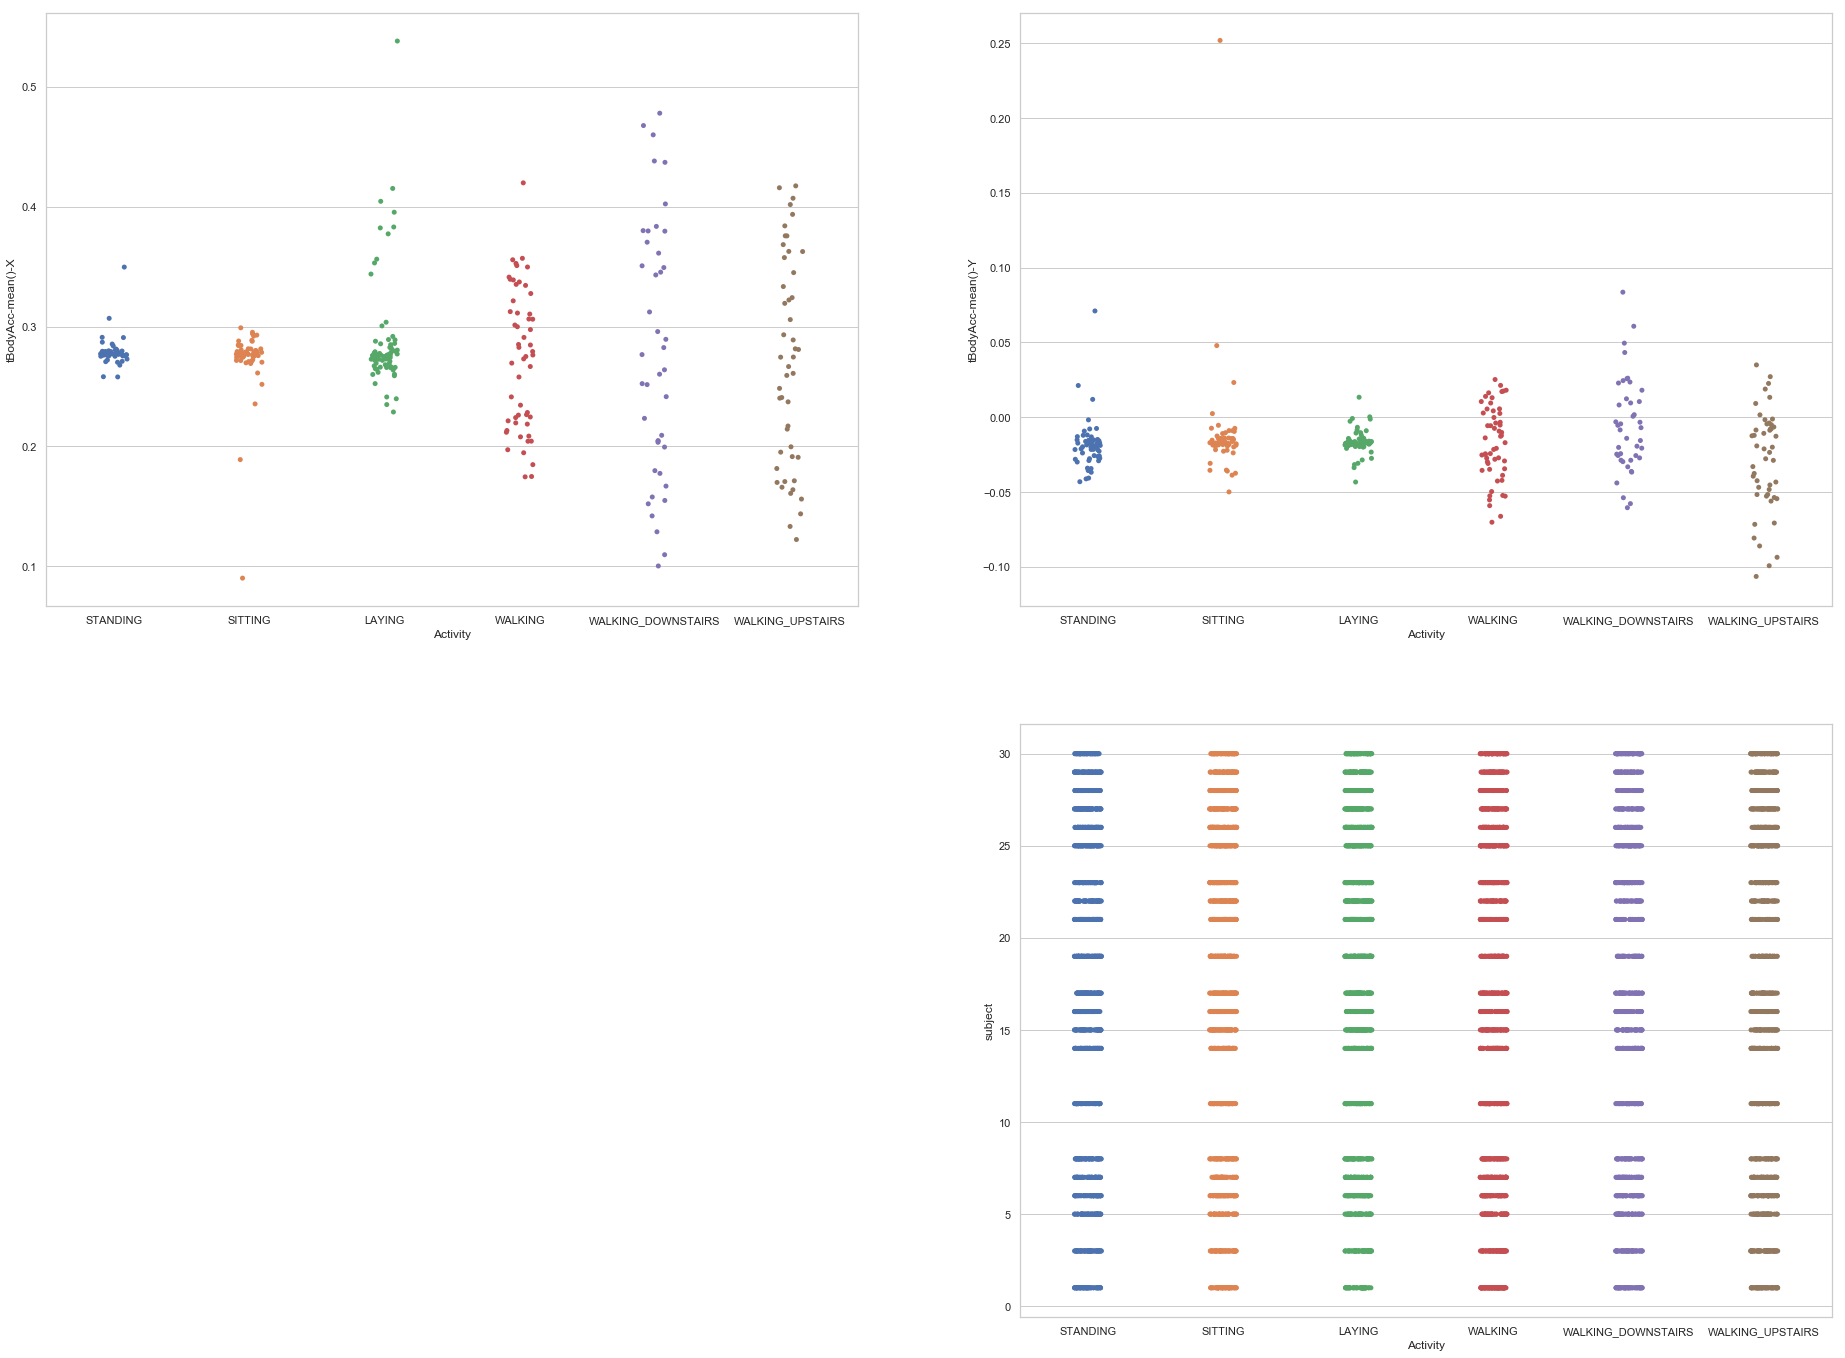

In [70]:
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sb.stripplot(x='Activity', y=sub15.iloc[:,0], data=train, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sb.stripplot(x='Activity', y=sub15.iloc[:,1], data=train, jitter=True)
ax2 = fig.add_subplot(224)
ax2 = sb.stripplot(x='Activity', y='subject', data=train, jitter=True)
plt.show()

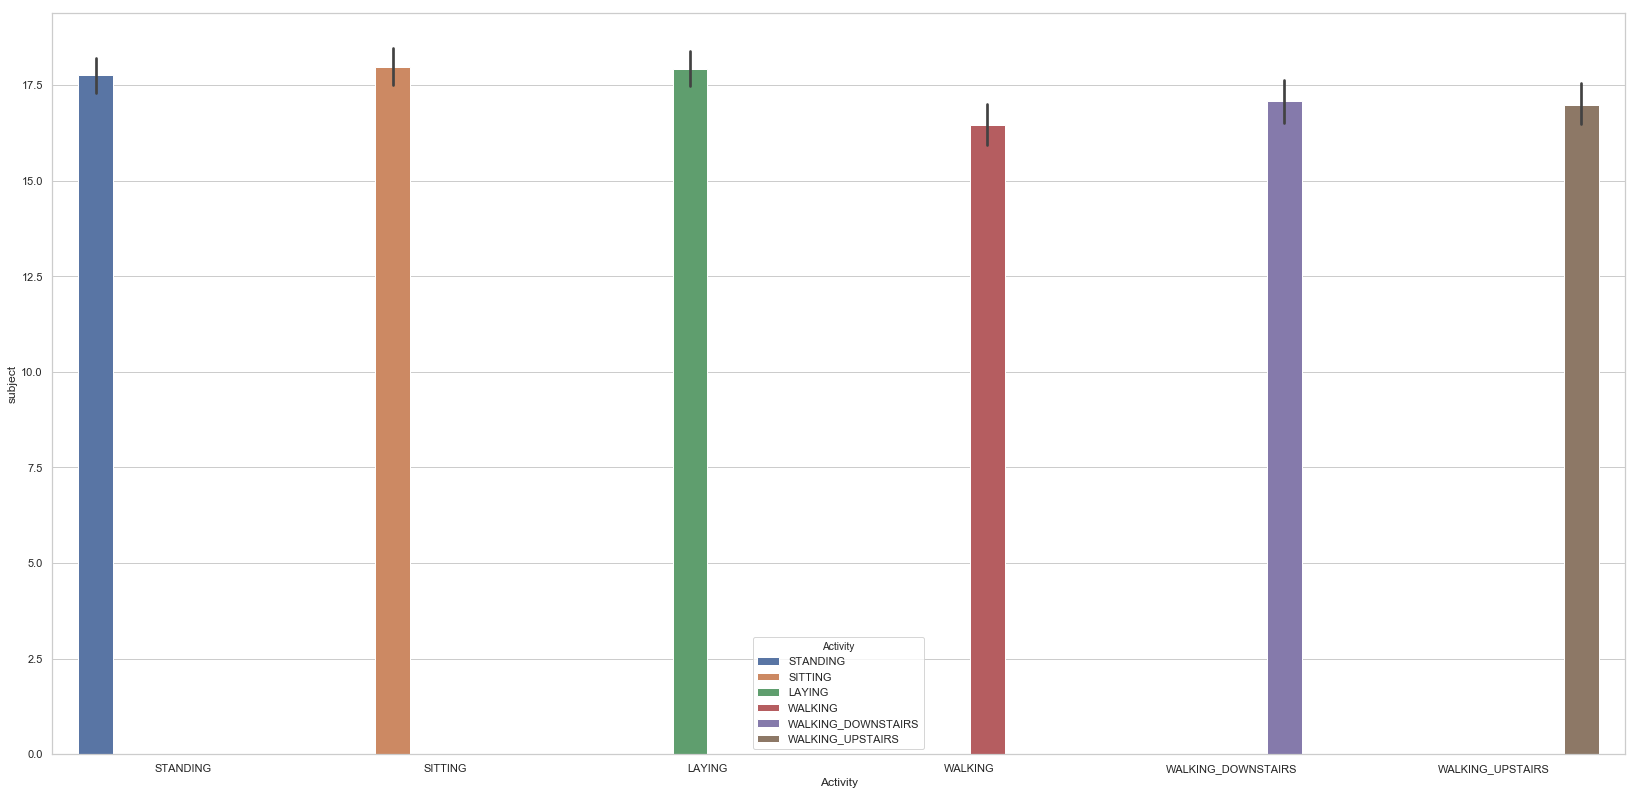

In [65]:
sb.set(style="whitegrid")
fig = plt.figure(figsize=(62,30))
ax1 = fig.add_subplot(223)
ax1 = sb.barplot(x="Activity",y="subject", hue="Activity", data=train)
